In [1]:
# Libraries.

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import wget
import math

## 1. Join the twelve dataframes from January to December into a single dataframe. Shows the total shape of the resulting dataframe.

In [2]:
# Download the data from internet.

# URL example of 1 .csv (the number 290, changes in each file increasing +2):
    # https://datos.madrid.es/egob/catalogo/210104-290-multas-circulacion-detalle.csv
    
# January-December 2020 --> 270-294 with jump 2.
lista1=[]
for i in range(270,294,2):
    url =f'https://datos.madrid.es/egob/catalogo/210104-{i}-multas-circulacion-detalle.csv'
    lista1.append(wget.download(url))

In [3]:
# Show the list of CSVs.
lista1

['210104-270-multas-circulacion-detalle.csv',
 '210104-272-multas-circulacion-detalle.csv',
 '210104-274-multas-circulacion-detalle.csv',
 '210104-276-multas-circulacion-detalle.csv',
 '210104-278-multas-circulacion-detalle.csv',
 '210104-280-multas-circulacion-detalle.csv',
 '210104-282-multas-circulacion-detalle.csv',
 '210104-284-multas-circulacion-detalle.csv',
 '210104-286-multas-circulacion-detalle.csv',
 '210104-288-multas-circulacion-detalle.csv',
 '210104-290-multas-circulacion-detalle.csv',
 '210104-292-multas-circulacion-detalle.csv']

In [4]:
# Read the CSVs from the previous list and forced column naming.

lista_csv=[]
for i,j in enumerate(list(range(12))):  
    j=pd.read_csv(lista1[i],sep=";",encoding="Latin1") #enero.csv,febrero.csv...
    j.columns=['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO','PUNTOS', 
 'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA','COORDENADA-X','COORDENADA-Y',]
    lista_csv.append(j)


C:\Users\macka\AppData\Local\Temp\ipykernel_11124\2803978289.py:5: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  j=pd.read_csv(lista1[i],sep=";",encoding="Latin1") #enero.csv,febrero.csv...


By giving us compatibility error because it detects variations in some of the columns of the CSV, we have created a list of CSVs and a list of columns, to normalize the texts of the columns with encoding="Latin1" to finally join them and create a unique dataframe.

In [5]:
# Show the datas in the list.
lista_csv

[       CALIFICACION                                     LUGAR  MES  ANIO  \
 0        GRAVE       ALFONSO XII                                 1  2020   
 1        GRAVE       AV BADAJOZ 5                                1  2020   
 2        LEVE        ARISTOTELES 7 POSTERIOR                     1  2020   
 3        LEVE        ARISTOTELES 7 POSTERIOR                     1  2020   
 4        LEVE        VIRGEN DE LLUC 70                           1  2020   
 ...             ...                                       ...  ...   ...   
 231635   GRAVE       SAN ALEJANDRO 10                            1  2020   
 231636   GRAVE       CEDACEROS 3                                 1  2020   
 231637   GRAVE       EMBAJADORES 59                              1  2020   
 231638   LEVE        MAUDES 54                                   1  2020   
 231639   LEVE        MAUDES 54                                   1  2020   
 
          HORA  IMP_BOL DESCUENTO  PUNTOS           DENUNCIANTE  \
 0     

In [6]:
# Join the all csv in a dataframe.
df_all=pd.DataFrame()
for i in lista_csv:
    df_all=pd.concat([df_all,i])
    

In [7]:
# Show information about data unified.
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993304 entries, 0 to 205938
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   CALIFICACION  object 
 1   LUGAR         object 
 2   MES           int64  
 3   ANIO          int64  
 4   HORA          float64
 5   IMP_BOL       float64
 6   DESCUENTO     object 
 7   PUNTOS        int64  
 8   DENUNCIANTE   object 
 9   HECHO-BOL     object 
 10  VEL_LIMITE    object 
 11  VEL_CIRCULA   object 
 12  COORDENADA-X  object 
 13  COORDENADA-Y  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 228.1+ MB


In [8]:
# Show data unified.
df_all

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA-X,COORDENADA-Y
0,GRAVE,ALFONSO XII,1,2020,12.18,200.0,SI,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,,,,
1,GRAVE,AV BADAJOZ 5,1,2020,9.46,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN DOBLE FILA. ...,,,,
2,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,13.55,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,
3,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,14.00,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,
4,LEVE,VIRGEN DE LLUC 70,1,2020,12.12,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA. ...,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205934,LEVE,CL PADRE DAMIAN 19,12,2020,14.14,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
205935,LEVE,CL JUAN RAMON JIMENEZ 2,12,2020,14.23,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO. VEHÍCULO DE CAT...,,,,
205936,LEVE,CL JUAN RAMON JIMENEZ 15,12,2020,14.30,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
205937,LEVE,CL VICTOR DE LA SERNA 1,12,2020,9.51,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,


## 2. As such, we are not going to work with geographic data, delete the __COORDENADA_X__ and __COORDENADA_Y__ columns.

In [9]:
# Remember the headers of dataframe.
df_all.columns

Index(['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO',
       'PUNTOS', 'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA',
       'COORDENADA-X', 'COORDENADA-Y'],
      dtype='object')

In [10]:
# Create a new dataframe without columns: COORDENADA_X and COORDENADA_Y.
df_all2=df_all[['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO',
       'PUNTOS', 'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA',]]

## 3. Check the unique values of the variables, there are some of them that do not have unique values, so they are constants, is it worth having them in the dataframe?

In [36]:
# Check how many uniques values there are in each columns.
df_all2.nunique()

CALIFICACION          3
LUGAR             99908
MES                  12
ANIO                  1
HORA                 24
IMP_BOL              10
DESCUENTO             1
PUNTOS                5
DENUNCIANTE           4
HECHO-BOL          1332
VEL_LIMITE            9
VEL_CIRCULA         130
DIFFERENCE_KMH       71
dtype: int64

In [11]:
# Check the unique value for DESCUENTO.
df_all2.DESCUENTO.unique()

array(['SI'], dtype=object)

In [12]:
# Check the unique value for ANIO.
df_all2.ANIO.unique()

array([2020], dtype=int64)

When verifying the columns we have seen that the Year and Discount column are the only ones that have unique value, they could be omitted in the case of dispensing with any more column.

## 4. It seems that the __VEL_LIMITE__ and __VEL_CIRCULA__ columns have empty values, this is because if the infraction was not caused by exceeding any speed limit, this value appears empty, change all the anomalies you detect to null.

In [38]:
# Check values of VEL_LIMITE.
df_all2.VEL_LIMITE.value_counts()


0.0     1549853
70.0     266321
90.0      94402
50.0      73036
80.0       3688
40.0       2472
60.0       2188
30.0       1343
20.0          1
Name: VEL_LIMITE, dtype: int64

In [14]:
# Replace all whites spaces by NaN values. 
df_all2=df_all2.replace(r'^\s*$', np.nan, regex=True)

### Translation regular expression

    1. r=raw string; 
    2. ^=Starts with; 
    3. \s=Returns a match where the string contains a white space character; 
    4. $=Ends with;

In [15]:
# Check values of VEL_LIMITE.
df_all2.VEL_LIMITE.value_counts()

 70    259747
 90     92510
 50     72859
70       6574
 80      3688
 40      2472
 60      2188
90       1892
 30      1343
50        177
 20         1
Name: VEL_LIMITE, dtype: int64

## 5. The two columns __VEL_LIMITE__ and __VEL_CIRCULA__ despite being two purely numerical columns, are recognized as "object" type, check the frequency of values, you will see that they are counted as text strings, therefore:
                5.1 Change the nulls of the two variables to 0
                5.2 Change the type of the variable to numeric
                5.3 What is the most repeated speed limit other than zero?


In [16]:
# Change columns VEL_LIMITE and VEL_CIRCULA to numeric. Replace Na values to 0.
df_all2["VEL_LIMITE"]=pd.to_numeric(df_all2["VEL_LIMITE"])
df_all2["VEL_LIMITE"]=df_all2.VEL_LIMITE.fillna(0)

df_all2["VEL_CIRCULA"]=pd.to_numeric(df_all2["VEL_CIRCULA"])
df_all2["VEL_CIRCULA"]=df_all2.VEL_CIRCULA.fillna(0)



In [17]:
# Check values of VEL_LIMITE.
df_all2.VEL_LIMITE.value_counts()

0.0     1549853
70.0     266321
90.0      94402
50.0      73036
80.0       3688
40.0       2472
60.0       2188
30.0       1343
20.0          1
Name: VEL_LIMITE, dtype: int64

In [18]:
# Check values of VEL_CIRCULA.
df_all2.VEL_CIRCULA.value_counts()

0.0      1549853
74.0       44737
75.0       37006
76.0       31681
77.0       27554
          ...   
153.0          4
157.0          3
158.0          3
156.0          2
159.0          2
Name: VEL_CIRCULA, Length: 130, dtype: int64

## 6. Generate a new column called DIFFERENCE_KMH that is the result of subtracting from each value of the speed at which the driver was circulating the speed limit at which the infraction occurred, to obtain a top 10 of the drivers who exceeded the limits to higher speed.

In [20]:
# Create a new column called DIFFERENCE_KMH which is the result of VEL_CIRCULA-VEL_LIMITE.
df_all2["DIFFERENCE_KMH"]=df_all2.VEL_CIRCULA.values-df_all2.VEL_LIMITE

In [21]:
# Sort the values in descending order and show top 10.
df_all2[['VEL_LIMITE', 'VEL_CIRCULA',"DIFFERENCE_KMH"]].sort_values(by="DIFFERENCE_KMH",ascending=False).head(10)

,VEL_LIMITE,VEL_CIRCULA,DIFFERENCE_KMH
71,70.0,140.0,70.0
75936,70.0,140.0,70.0
68661,90.0,160.0,70.0
75935,90.0,160.0,70.0
61556,90.0,160.0,70.0
59480,90.0,160.0,70.0
30364,70.0,139.0,69.0
61555,70.0,139.0,69.0
69609,90.0,159.0,69.0
59479,90.0,159.0,69.0


## 7. Obtain a dataframe filtered by all the complaints that have led to the withdrawal of points (that is, points other than zero). Group the dataframe filtered by the public agent that issues the complaint, which of all the public agents has a higher average point withdrawal?

In [22]:
# Create a new dataframe with the values in the columns DENUNCIANTE and PUNTOS, without PUNTOS values equal 0.
df_points=df_all2.loc[:,['DENUNCIANTE',"PUNTOS"]][df_all2["PUNTOS"] != 0];df_points

,DENUNCIANTE,PUNTOS
0,POLICIA MUNICIPAL,3
11,POLICIA MUNICIPAL,3
17,POLICIA MUNICIPAL,4
25,POLICIA MUNICIPAL,4
87,AGENTES DE MOVILIDAD,4
...,...,...
195775,POLICIA MUNICIPAL,3
195776,POLICIA MUNICIPAL,6
195778,POLICIA MUNICIPAL,4
195779,POLICIA MUNICIPAL,3


In [23]:
# Check values of df_points.
df_points.value_counts()

DENUNCIANTE           PUNTOS
POLICIA MUNICIPAL     2         22034
AGENTES DE MOVILIDAD  4         15415
POLICIA MUNICIPAL     4          9323
                      3          5961
                      6          5820
AGENTES DE MOVILIDAD  3          1747
                      2           405
                      6           121
dtype: int64

In [24]:
# Check values average of df_points grouping by DENUNCIANTE
df_points.groupby(["DENUNCIANTE"]).mean()["PUNTOS"]

DENUNCIANTE
AGENTES DE MOVILIDAD    3.869120
POLICIA MUNICIPAL       3.110089
Name: PUNTOS, dtype: float64

## 8. Eliminate the decimal part from the hour column, then, shows graphically in which hours more fines have occurred.

In [25]:
# Eliminate the decimal parts from column HORA.
df_all2['HORA'] = df_all2['HORA'].apply(lambda x: math.floor(x))

In [26]:
# Check the dataframe.
df_all2

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIFFERENCE_KMH
0,GRAVE,ALFONSO XII,1,2020,12,200.0,SI,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,0.0,0.0,0.0
1,GRAVE,AV BADAJOZ 5,1,2020,9,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN DOBLE FILA. ...,0.0,0.0,0.0
2,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,13,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,0.0,0.0,0.0
3,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,14,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,0.0,0.0,0.0
4,LEVE,VIRGEN DE LLUC 70,1,2020,12,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA. ...,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205934,LEVE,CL PADRE DAMIAN 19,12,2020,14,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",0.0,0.0,0.0
205935,LEVE,CL JUAN RAMON JIMENEZ 2,12,2020,14,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO. VEHÍCULO DE CAT...,0.0,0.0,0.0
205936,LEVE,CL JUAN RAMON JIMENEZ 15,12,2020,14,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",0.0,0.0,0.0
205937,LEVE,CL VICTOR DE LA SERNA 1,12,2020,9,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",0.0,0.0,0.0


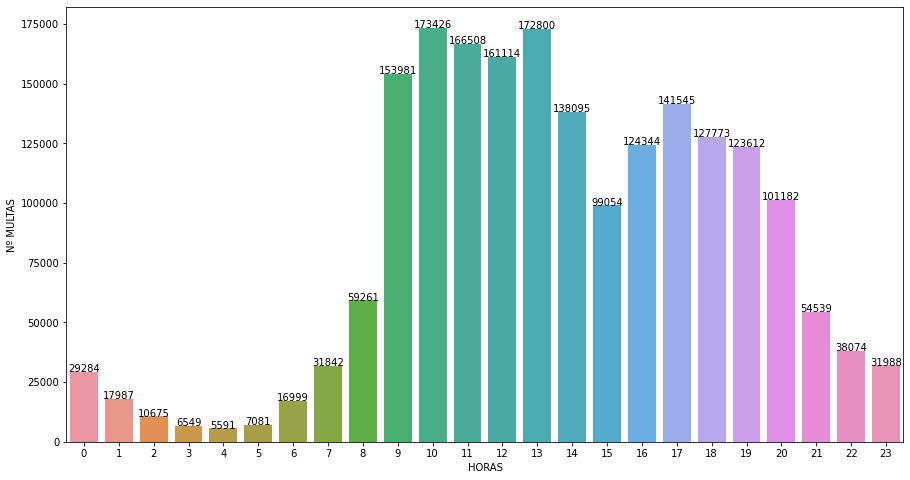

In [27]:
# Plot number of fines vs HORAS.
fig, ax = plt.subplots(1,1, figsize=(15,8))

sns.countplot(x=df_all2["HORA"])
hours = df_all2.groupby(["HORA"]).count()["CALIFICACION"]

for i in range(len(hours.values)):
    ax.text(i, hours.values[i], hours.values[i], horizontalalignment='center')
plt.xlabel("HORAS")
plt.ylabel("Nº MULTAS")
plt.show()

## 9. Graphically shows the fines made during the months of 2020. Knowing that the confinement in Spain began in March of that year, is the effect of the pandemic noticeable?

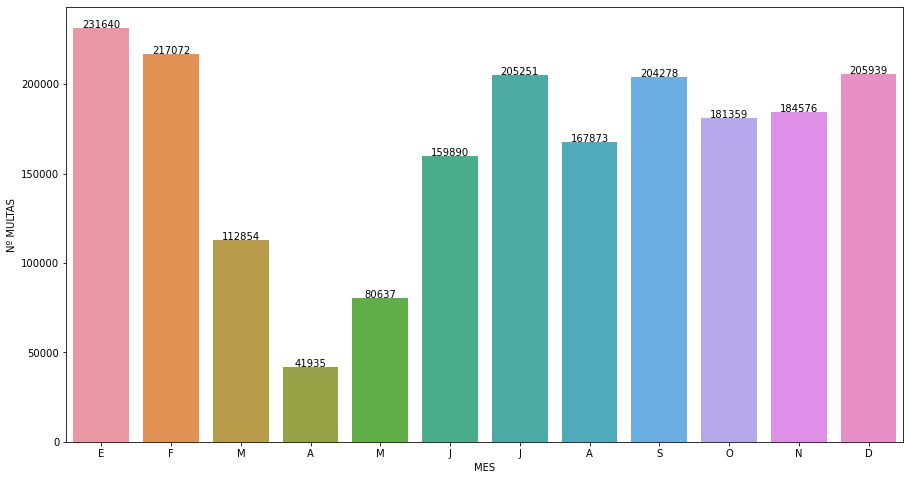

In [28]:
# Plot number of fines vs MES.
meses_abrv=["E", "F", "M", "A", "M", "J","J","A","S","O","N","D"]
fig, ax = plt.subplots(1,1, figsize=(15,8))

sns.countplot(x=df_all2["MES"])
hours = df_all2.groupby(["MES"]).count()["CALIFICACION"]

for i in range(len(hours.values)):
    ax.text(i, hours.values[i], hours.values[i], horizontalalignment='center')
    
plt.xticks(range(0,12),meses_abrv)
plt.ylabel("Nº MULTAS")
plt.show()

## 10. Shows graphically the number of infractions (without accumulated frequency), of each of the public agents based on the classification of the infraction

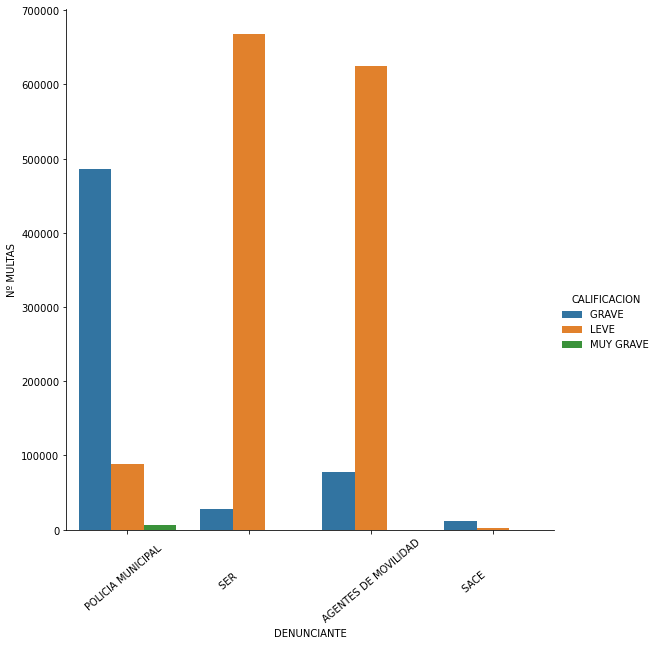

In [29]:
# Plot number of fines vs DENUNCIANTE, filtering by CALIFICACION.
fig=sns.catplot(x = "DENUNCIANTE", data = df_all2, kind = "count", hue = "CALIFICACION", height=8)
plt.xticks(rotation=40)
plt.ylabel("Nº MULTAS")
plt.show()